In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
import os
notebook_path = os.path.abspath("data-training.ipynb")
dataset_path = os.path.join(os.path.dirname(notebook_path), "Dataset/Dataset Phising Website.csv")
dataset_path

'/home/luz/Documents/Projet Integrateur/Projet-Integrateur---5SDBS/Dataset/Dataset Phising Website.csv'

In [4]:
try:
    # Read dataset
    df = pd.read_csv(dataset_path)
except FileNotFoundError as e:
    print(f"Error : {e}")

In [5]:
print("\nfeatures :")
print(df.head())


features :
   index  having_IP_Address  URL_Length  Shortining_Service  having_At_Symbol  \
0      0                 -1           1                   1                 1   
1      1                  1           1                   1                 1   
2      2                  1           0                   1                 1   
3      3                  1           0                   1                 1   
4      4                  1           0                  -1                 1   

   double_slash_redirecting  Prefix_Suffix  having_Sub_Domain  SSLfinal_State  \
0                        -1             -1                 -1              -1   
1                         1             -1                  0               1   
2                         1             -1                 -1              -1   
3                         1             -1                 -1              -1   
4                         1             -1                  1               1   

   Domain_regi

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22110 entries, 0 to 22109
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        22110 non-null  int64
 1   having_IP_Address            22110 non-null  int64
 2   URL_Length                   22110 non-null  int64
 3   Shortining_Service           22110 non-null  int64
 4   having_At_Symbol             22110 non-null  int64
 5   double_slash_redirecting     22110 non-null  int64
 6   Prefix_Suffix                22110 non-null  int64
 7   having_Sub_Domain            22110 non-null  int64
 8   SSLfinal_State               22110 non-null  int64
 9   Domain_registeration_length  22110 non-null  int64
 10  Favicon                      22110 non-null  int64
 11  port                         22110 non-null  int64
 12  HTTPS_token                  22110 non-null  int64
 13  Request_URL                  22110 non-null  i

In [7]:
df.describe()

,index,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,22110.000000,22110.000000,22110.000000,22110.000000,22110.000000,22110.000000,22110.000000,22110.000000,22110.000000,22110.000000,...,22110.000000,22110.000000,22110.000000,22110.000000,22110.000000,22110.000000,22110.000000,22110.000000,22110.000000,22110.000000
mean,11054.500000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,6382.751562,0.949512,0.766078,0.673983,0.713582,0.670996,0.678124,0.817500,0.911872,0.941608,...,0.789800,0.576771,0.998146,0.926188,0.827715,0.875269,0.692353,0.569931,0.694421,0.993516
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,5527.250000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,11054.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,16581.750000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,22109.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
conteo = (df['having_IP_Address'] == -1).sum()
print(conteo)

7586


In [7]:
df.isnull().sum()

index                          0
having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

## Split dataset and feature analysis

In [8]:
# Split dataset in train and test
X = df.iloc[:,1:31]  # Features
y = df.iloc[:, 31]  # Cible (labels)

# Diviser en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

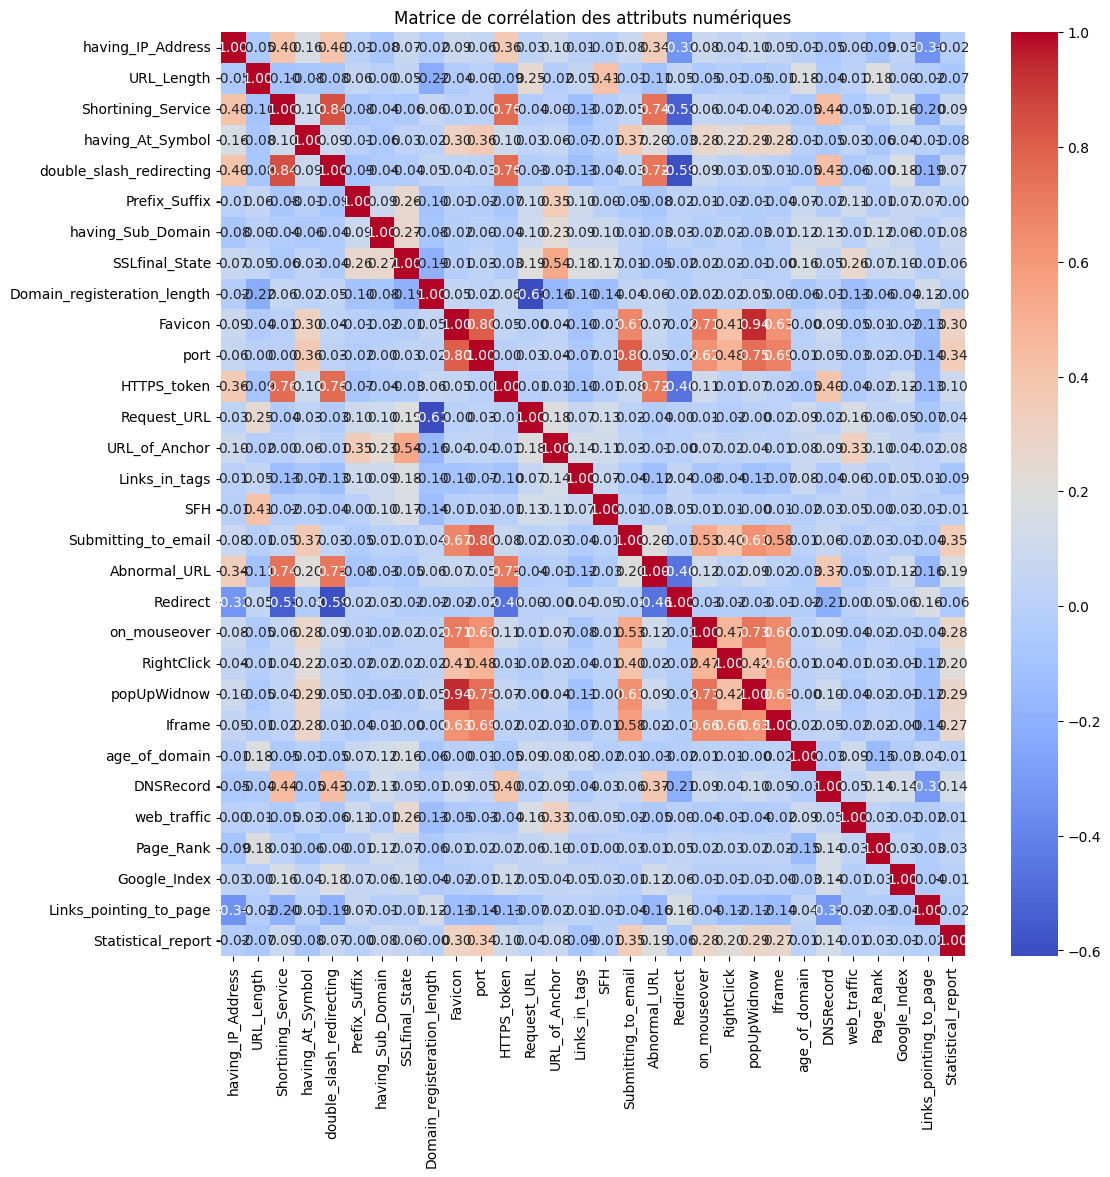

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
having_IP_Address,1.000000,-0.052411,0.403461,0.158699,0.397389,-0.005257,-0.080745,0.071414,-0.022739,0.087025,...,0.042881,0.096882,0.054694,-0.010446,-0.050733,0.002922,-0.091774,0.029153,-0.339065,-0.019103
URL_Length,-0.052411,1.000000,-0.097881,-0.075108,-0.081247,0.055247,0.003997,0.048754,-0.221892,-0.042497,...,-0.013613,-0.049381,-0.013838,0.179426,-0.040823,0.008993,0.183518,0.002902,-0.022987,-0.067153
Shortining_Service,0.403461,-0.097881,1.000000,0.104447,0.842796,-0.080471,-0.041916,-0.061426,0.060923,0.006101,...,0.038118,0.036616,0.016581,-0.052596,0.436064,-0.047074,0.014591,0.155844,-0.198410,0.085461
having_At_Symbol,0.158699,-0.075108,0.104447,1.000000,0.086960,-0.011726,-0.058976,0.031220,0.015522,0.304899,...,0.219503,0.290893,0.284410,-0.005499,-0.047872,0.032918,-0.064735,0.037061,-0.006080,-0.080357
double_slash_redirecting,0.397389,-0.081247,0.842796,0.086960,1.000000,-0.085590,-0.043079,-0.036200,0.047464,0.035100,...,0.025863,0.054463,0.010459,-0.050107,0.431409,-0.062369,-0.003132,0.178415,-0.194165,0.070390
Prefix_Suffix,-0.005257,0.055247,-0.080471,-0.011726,-0.085590,1.000000,0.087891,0.261391,-0.096799,-0.007504,...,-0.024868,-0.014733,-0.036904,0.074116,-0.016556,0.110598,-0.006834,0.067781,0.067423,-0.002763
having_Sub_Domain,-0.080745,0.003997,-0.041916,-0.058976,-0.043079,0.087891,1.000000,0.267649,-0.082839,-0.016704,...,0.018230,-0.025312,0.010637,0.119254,0.125493,-0.005764,0.120730,0.057673,-0.010526,0.081627
SSLfinal_State,0.071414,0.048754,-0.061426,0.031220,-0.036200,0.261391,0.267649,1.000000,-0.193622,-0.014757,...,0.015854,-0.013005,-0.002773,0.162809,0.050972,0.258768,0.074545,0.096051,-0.011710,0.063411
Domain_registeration_length,-0.022739,-0.221892,0.060923,0.015522,0.047464,-0.096799,-0.082839,-0.193622,1.000000,0.054253,...,0.023520,0.051410,0.004393,-0.062851,-0.010477,-0.134454,-0.059898,-0.039766,0.122672,-0.002212
Favicon,0.087025,-0.042497,0.006101,0.304899,0.035100,-0.007504,-0.016704,-0.014757,0.054253,1.000000,...,0.414382,0.939633,0.627607,-0.002628,0.088211,-0.050922,0.011699,-0.016668,-0.127243,0.300917


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 12))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation des attributs numériques")
plt.show()

In [25]:
target = 'Result'
corr = df.corr()
correlations = corr[target].drop(target)
corr_min=0.2
relevant_features=correlations[abs(correlations)>corr_min].index.tolist()
print(relevant_features)
print(len(relevant_features))

['Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'web_traffic']
9


## First training

In [43]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
models = {
    'RandomForest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(algorithm="SAMME"),
    'GradientBoosting': GradientBoostingClassifier()
}

In [22]:
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np
from codecarbon import EmissionsTracker
tracker = EmissionsTracker()
tracker.start()

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f'{name} - Accuracy: {np.mean(scores):.4f}')


[codecarbon ERROR @ 09:59:06] Error: Another instance of codecarbon is probably running as we find `/tmp/.codecarbon.lock`. Turn off the other instance to be able to run this one or use `allow_multiple_runs` or delete the file. Exiting.
[codecarbon WARNING @ 09:59:06] Another instance of codecarbon is already running. Exiting.


RandomForest - Accuracy: 0.9828
AdaBoost - Accuracy: 0.9313
GradientBoosting - Accuracy: 0.9504


In [23]:
from sklearn.metrics import classification_report, confusion_matrix

# Generating classification_report, confusion_matrix
for name, model in models.items():
    # Training Model
    model.fit(X_train, y_train)
    
    # Predict Test Set
    y_pred = model.predict(X_test)
    
    # Printing classification_report
    print(f'\n{name} - Classification Report:')
    print(classification_report(y_test, y_pred))
    
    # Printing confusion_matrix
    print(f'{name} - Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))


[codecarbon INFO @ 09:59:16] Energy consumed for RAM : 0.000190 kWh. RAM Power : 6.528794288635254 W
[codecarbon INFO @ 09:59:16] Energy consumed for all CPUs : 0.000365 kWh. Total CPU Power : 12.5 W
[codecarbon INFO @ 09:59:16] 0.000555 kWh of electricity used since the beginning.



RandomForest - Classification Report:
              precision    recall  f1-score   support

          -1       0.99      0.98      0.98      1964
           1       0.98      0.99      0.99      2458

    accuracy                           0.98      4422
   macro avg       0.98      0.98      0.98      4422
weighted avg       0.98      0.98      0.98      4422

RandomForest - Confusion Matrix:
[[1921   43]
 [  28 2430]]

AdaBoost - Classification Report:
              precision    recall  f1-score   support

          -1       0.93      0.91      0.92      1964
           1       0.93      0.94      0.94      2458

    accuracy                           0.93      4422
   macro avg       0.93      0.93      0.93      4422
weighted avg       0.93      0.93      0.93      4422

AdaBoost - Confusion Matrix:
[[1784  180]
 [ 140 2318]]

GradientBoosting - Classification Report:
              precision    recall  f1-score   support

          -1       0.95      0.93      0.94      1964
    

## Training model with just Address Bar based features

The paper that comes with the dataset being used specifies 4 different types of features. The first type is Address Bar based features. Since those are the features more easily obtained from a website, we'll train the model just with them to see if those are sufficient. Then we'll do the same with the other type of features in order to optimize our future extension, less features implies less time of data collecting and processing.

In [24]:
# Split dataset in train and test
X = df.iloc[:,1:13]  # Address Bar based features
y = df.iloc[:, 31]  # labels

# train and test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

In [25]:
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f'{name} - Accuracy: {np.mean(scores):.4f}')

RandomForest - Accuracy: 0.9128
AdaBoost - Accuracy: 0.8989
GradientBoosting - Accuracy: 0.9020


## Training model with Abnormal based features and HTML/Javascript based features

In [26]:
# Split dataset in train and test
X = df.iloc[:,13:24]  # Address Bar based features
y = df.iloc[:, 31]  # labels

# train and test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

In [27]:
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f'{name} - Accuracy: {np.mean(scores):.4f}')

RandomForest - Accuracy: 0.8814
AdaBoost - Accuracy: 0.8696
GradientBoosting - Accuracy: 0.8750


## Training model with Domain based features

In [28]:
X = df.iloc[:,24:31]  # Address Bar based features
y = df.iloc[:, 31]  # labels

# train and test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

In [29]:
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f'{name} - Accuracy: {np.mean(scores):.4f}')

RandomForest - Accuracy: 0.7483
AdaBoost - Accuracy: 0.7071


[codecarbon INFO @ 09:59:31] Energy consumed for RAM : 0.000218 kWh. RAM Power : 6.528794288635254 W
[codecarbon INFO @ 09:59:31] Energy consumed for all CPUs : 0.000417 kWh. Total CPU Power : 12.5 W
[codecarbon INFO @ 09:59:31] 0.000634 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:59:31] 0.000296 g.CO2eq/s mean an estimation of 9.340009234917106 kg.CO2eq/year


GradientBoosting - Accuracy: 0.7358


In [30]:
columns_1_to_12 = df.iloc[:, 1:13]

# Selecciona las columnas de la 22 a la 30
columns_22_to_30 = df.iloc[:, 22:31]

# Combina ambas selecciones en un único DataFrame
selected_columns = pd.concat([columns_1_to_12, columns_22_to_30], axis=1)

X = selected_columns  # Address Bar based features
y = df.iloc[:, 31]  # labels

# train and test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)


In [31]:
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f'{name} - Accuracy: {np.mean(scores):.4f}')

RandomForest - Accuracy: 0.9586
AdaBoost - Accuracy: 0.9051
GradientBoosting - Accuracy: 0.9220


In [32]:
columns_1_to_12 = df.iloc[:, 1:13]

# Selecciona las columnas de la 13 a la 22
columns_13_to_22 = df.iloc[:, 13:23]

# Combina ambas selecciones en un único DataFrame
selected_columns = pd.concat([columns_1_to_12, columns_13_to_22], axis=1)

X = selected_columns  # Address Bar based features
y = df.iloc[:, 31]  # labels

# train and test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

In [33]:
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f'{name} - Accuracy: {np.mean(scores):.4f}')

RandomForest - Accuracy: 0.9579
AdaBoost - Accuracy: 0.9258


[codecarbon INFO @ 09:59:46] Energy consumed for RAM : 0.000245 kWh. RAM Power : 6.528794288635254 W
[codecarbon INFO @ 09:59:46] Energy consumed for all CPUs : 0.000469 kWh. Total CPU Power : 12.5 W
[codecarbon INFO @ 09:59:46] 0.000714 kWh of electricity used since the beginning.


GradientBoosting - Accuracy: 0.9374


In [34]:
columns_13_to_22 = df.iloc[:, 13:23]

# Selecciona las columnas de la 13 a la 22
columns_23_to_30 = df.iloc[:, 23:31]

# Combina ambas selecciones en un único DataFrame
selected_columns = pd.concat([columns_13_to_22, columns_23_to_30], axis=1)

X = selected_columns  # Address Bar based features
y = df.iloc[:, 31]  # labels

# train and test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

In [35]:
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f'{name} - Accuracy: {np.mean(scores):.4f}')

RandomForest - Accuracy: 0.9389
AdaBoost - Accuracy: 0.8802
GradientBoosting - Accuracy: 0.9004


## Final training with available features

In [32]:
features_not_available = ['index', 'Shortining_Service','SSLfinal_State','port','Request_URL','URL_of_Anchor', 'Links_in_tags','SFH','Submitting_to_email','Abnormal_URL','on_mouseover','RightClick','Page_Rank','Google_Index','Statistical_report']
df_final = df.drop(columns=features_not_available)
df_final.head()

,having_IP_Address,URL_Length,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,Domain_registeration_length,Favicon,HTTPS_token,Redirect,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Links_pointing_to_page,Result
0,-1,1,1,-1,-1,-1,-1,1,-1,0,1,1,-1,-1,-1,1,-1
1,1,1,1,1,-1,0,-1,1,-1,0,1,1,-1,-1,0,1,-1
2,1,0,1,1,-1,-1,-1,1,-1,0,1,1,1,-1,1,0,-1
3,1,0,1,1,-1,-1,1,1,-1,0,1,1,-1,-1,1,-1,-1
4,1,0,1,1,-1,1,-1,1,1,0,-1,1,-1,-1,0,1,1


In [34]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22110 entries, 0 to 22109
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            22110 non-null  int64
 1   URL_Length                   22110 non-null  int64
 2   having_At_Symbol             22110 non-null  int64
 3   double_slash_redirecting     22110 non-null  int64
 4   Prefix_Suffix                22110 non-null  int64
 5   having_Sub_Domain            22110 non-null  int64
 6   Domain_registeration_length  22110 non-null  int64
 7   Favicon                      22110 non-null  int64
 8   HTTPS_token                  22110 non-null  int64
 9   Redirect                     22110 non-null  int64
 10  popUpWidnow                  22110 non-null  int64
 11  Iframe                       22110 non-null  int64
 12  age_of_domain                22110 non-null  int64
 13  DNSRecord                    22110 non-null  i

In [38]:
X = df.iloc[:,0:16]  # Features
y = df.iloc[:, 16]  # Cible (labels)

# Diviser en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

# Generating classification_report, confusion_matrix
for name, model in models.items():
    # Training Model
    model.fit(X_train, y_train)
    
    # Predict Test Set
    y_pred = model.predict(X_test)
    
    # Printing classification_report
    print(f'\n{name} - Classification Report:')
    print(classification_report(y_test, y_pred))
    
    # Printing confusion_matrix
    print(f'{name} - Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))


RandomForest - Classification Report:
              precision    recall  f1-score   support

          -1       0.91      0.93      0.92      3383
           0       0.42      0.31      0.36       313
           1       0.73      0.71      0.72       726

    accuracy                           0.85      4422
   macro avg       0.69      0.65      0.67      4422
weighted avg       0.84      0.85      0.85      4422

RandomForest - Confusion Matrix:
[[3158   83  142]
 [ 164   98   51]
 [ 159   51  516]]

AdaBoost - Classification Report:
              precision    recall  f1-score   support

          -1       0.81      0.96      0.88      3383
           0       0.00      0.00      0.00       313
           1       0.56      0.32      0.40       726

    accuracy                           0.79      4422
   macro avg       0.46      0.42      0.43      4422
weighted avg       0.71      0.79      0.74      4422

AdaBoost - Confusion Matrix:
[[3246    0  137]
 [ 269    0   44]
 [ 497    0

/home/luz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/luz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/luz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



GradientBoosting - Classification Report:
              precision    recall  f1-score   support

          -1       0.84      0.99      0.91      3383
           0       0.56      0.03      0.05       313
           1       0.84      0.50      0.63       726

    accuracy                           0.84      4422
   macro avg       0.75      0.50      0.53      4422
weighted avg       0.82      0.84      0.80      4422

GradientBoosting - Confusion Matrix:
[[3334    4   45]
 [ 280    9   24]
 [ 361    3  362]]


In [48]:
import joblib
from sklearn.model_selection import GridSearchCV
# Configurations des modèles et hyperparamètres
param_grids = {
    'RandomForest': {
        'n_estimators': [100, 200],         
        'max_depth': [10, 20],         
        'min_samples_split': [5, 10]
    },
    'AdaBoost': {
        'n_estimators': [100, 200],         
        'learning_rate': [0.01, 0.1]
    },
    'GradientBoosting': {
        'n_estimators': [100, 200, 300],         
        'learning_rate': [0.05, 0.1], 
        'max_depth': [3, 5, 10]
    }
}


# Résultats finaux
best_models = {}
best_params = {}

# Recherche par grille pour chaque modèle
for model_name, model in models.items():
    print(f"\nOptimisation des hyperparamètres pour {model_name}...")
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[model_name],
        scoring='accuracy',
        cv=5,
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)

    # Meilleur modèle et paramètres
    best_models[model_name] = grid_search.best_estimator_
    best_params[model_name] = grid_search.best_params_

    print(f"\nMeilleurs paramètres pour {model_name} : {grid_search.best_params_}")
    print(f"Meilleur score (cross-validation) : {grid_search.best_score_:.4f}")
    
    best_score_int = int(grid_search.best_score_ * 10000)
    filename = f"{model_name}_BestModel_{best_score_int}.joblib"
    joblib.dump(grid_search.best_estimator_, filename)

# Évaluation sur les données de test
for model_name, best_model in best_models.items():
    print(f"\nÉvaluation du meilleur modèle {model_name} sur l'ensemble de test :")
    y_pred = best_model.predict(X_test)
    print(classification_report(y_test, y_pred))


Optimisation des hyperparamètres pour RandomForest...

Meilleurs paramètres pour RandomForest : {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Meilleur score (cross-validation) : 0.8594

Optimisation des hyperparamètres pour AdaBoost...

Meilleurs paramètres pour AdaBoost : {'learning_rate': 0.01, 'n_estimators': 100}
Meilleur score (cross-validation) : 0.7631

Optimisation des hyperparamètres pour GradientBoosting...

Meilleurs paramètres pour GradientBoosting : {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 200}
Meilleur score (cross-validation) : 0.8567

Évaluation du meilleur modèle RandomForest sur l'ensemble de test :
              precision    recall  f1-score   support

          -1       0.89      0.96      0.92      3383
           0       0.50      0.22      0.31       313
           1       0.75      0.68      0.71       726

    accuracy                           0.86      4422
   macro avg       0.72      0.62      0.65      4422
weighted avg   

/home/luz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/luz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/luz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [36]:
tracker.stop()

[codecarbon WARNING @ 09:59:55] Another instance of codecarbon is already running. Exiting.
[codecarbon INFO @ 10:00:01] Energy consumed for RAM : 0.000272 kWh. RAM Power : 6.528794288635254 W
[codecarbon INFO @ 10:00:01] Energy consumed for all CPUs : 0.000521 kWh. Total CPU Power : 12.5 W
[codecarbon INFO @ 10:00:01] 0.000793 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:00:16] Energy consumed for RAM : 0.000299 kWh. RAM Power : 6.528794288635254 W
[codecarbon INFO @ 10:00:16] Energy consumed for all CPUs : 0.000573 kWh. Total CPU Power : 12.5 W
[codecarbon INFO @ 10:00:16] 0.000872 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:00:31] Energy consumed for RAM : 0.000326 kWh. RAM Power : 6.528794288635254 W
[codecarbon INFO @ 10:00:31] Energy consumed for all CPUs : 0.000625 kWh. Total CPU Power : 12.5 W
[codecarbon INFO @ 10:00:31] 0.000951 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:00:46] Energy consumed for RAM : 0.00